# Exploratory Data Analysis and Natural Language Processing on Instacart Dataset



Importing necessary libraries and modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Exploration

Importing all files as Dataframe objects

In [4]:
aisles = pd.read_csv("../input/instacart-market-basket-analysis/aisles.csv")
departments = pd.read_csv("../input/instacart-market-basket-analysis/departments.csv")
order_products_train = pd.read_csv("../input/instacart-market-basket-analysis/order_products__prior.csv")
order_products_test = pd.read_csv("../input/instacart-market-basket-analysis/order_products__train.csv")
orders = pd.read_csv("../input/instacart-market-basket-analysis/orders.csv")
products = pd.read_csv("../input/instacart-market-basket-analysis/products.csv")
order_products_prior= pd.read_csv("../input/instacart-market-basket-analysis/order_products__prior.csv")

Now we will explore each dataframe further for better understanding.

**Aisles**

In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [8]:
aisles["aisle"]

0           prepared soups salads
1               specialty cheeses
2             energy granola bars
3                   instant foods
4      marinades meat preparation
                  ...            
129      hot cereal pancake mixes
130                     dry pasta
131                        beauty
132    muscles joints pain relief
133    specialty wines champagnes
Name: aisle, Length: 134, dtype: object

**Departments**

In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


**order_products_train**

In [12]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [14]:
order_products_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [15]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

**Orders**

In [16]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [18]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

In [19]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [20]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [21]:
orders.fillna(0,inplace=True)

In [22]:
orders[orders["days_since_prior_order"]=="NA"]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


**Products**

In [23]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [24]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [25]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


# Data Visualisation

**The above textual data can be understood better with the help of graphs.**

Now let us see how the ordering habit changes with each day of the week.

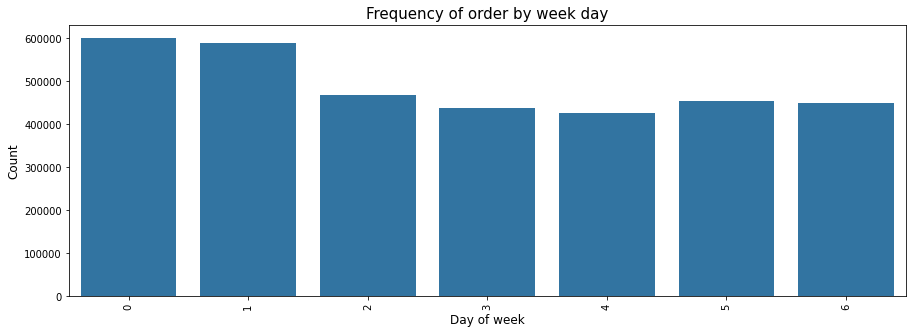

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x="order_dow", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

From the above graph we can see that there is a hike in the number of orders on the weekend i.e Saturday and Sunday, the least number of orders were done on Wednesday.

Now we shall see how the distribution is with respect to time of the day.

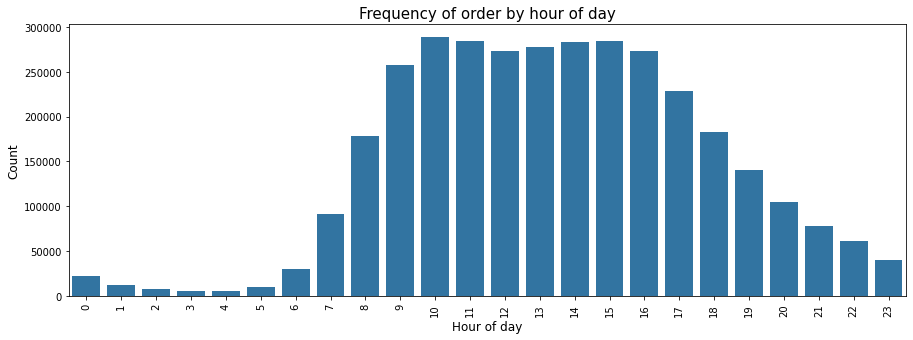

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x="order_hour_of_day", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

Now we will combine the day of week and hour of day to see the distribution with the help of a heatmap

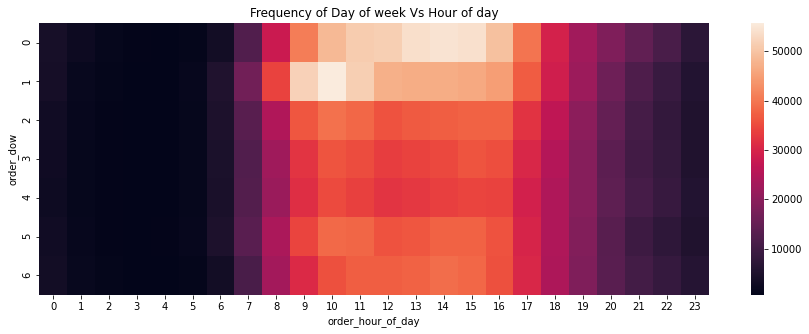

In [28]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,5))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

From the heatmap its evident that most orders are done on Saturday and Sunday mornings (9am to 5pm)

Now let us check the time interval between orders.

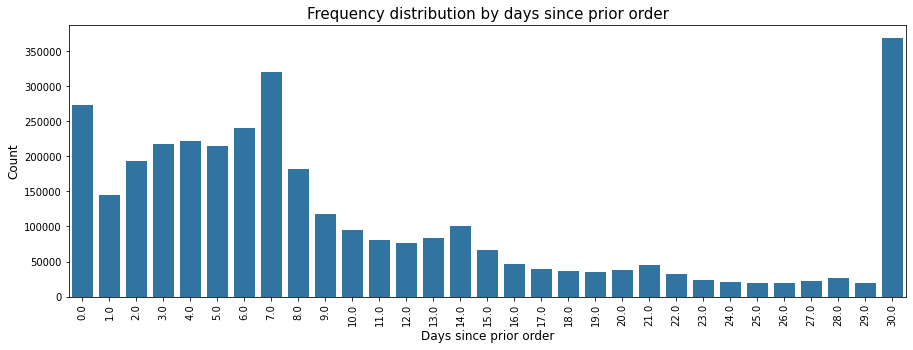

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x="days_since_prior_order", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

From the graph we see a spike every 7 days and 30 days.Thus we can conclude most customers order on a weekly or monthly basis. We can also see smaller peaks at 14, 21 and 28 days (weekly intervals). Another explaination for the spike after 30 days is because any order that is made more than 30 days since the previous order is declared as 30 days.



Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set

In [30]:
# percentage of re-orders in prior set #
order_products_prior.reordered.sum() / order_products_prior.shape[0]

0.5896974667922161

In [31]:
# percentage of re-orders in train set #
order_products_train.reordered.sum() / order_products_train.shape[0]

0.5896974667922161

There is a 59% of reorders in both train and prior sets.

 There will also be situations when none of the products are re-ordered. Let us check that now in prior and test sets.

In [32]:
grouped_df = order_products_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"][grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [33]:
grouped_df = order_products_train.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"][grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

Now let us see the number of products bought in each order.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


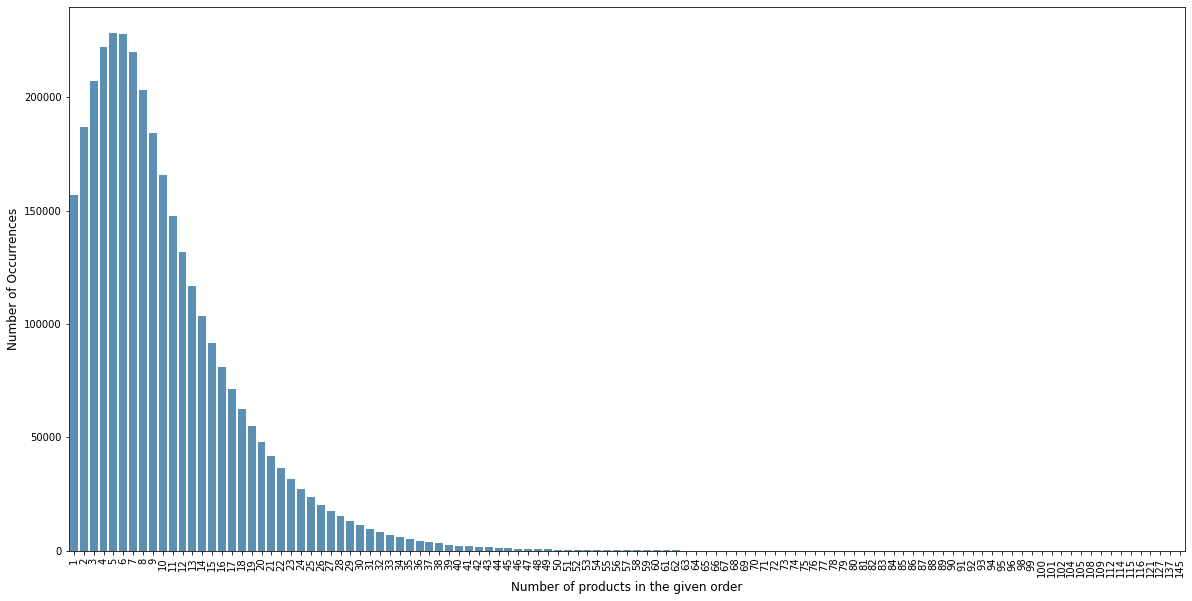

In [34]:
grouped_df = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(20,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The highest number of products ordered peaks at 5 and gradually reduces to the right.

For a more meaningful understanding the data at hand, we will merge the aisles, product and department dataframes and explore the merged dataframe further.

In [35]:
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


Now lets see the most bought items.

In [36]:
cnt_srs = order_products_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


The most frequently bought items are organic fruits and vegetables. 

Now lets explore the most frequently bought aisles section.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


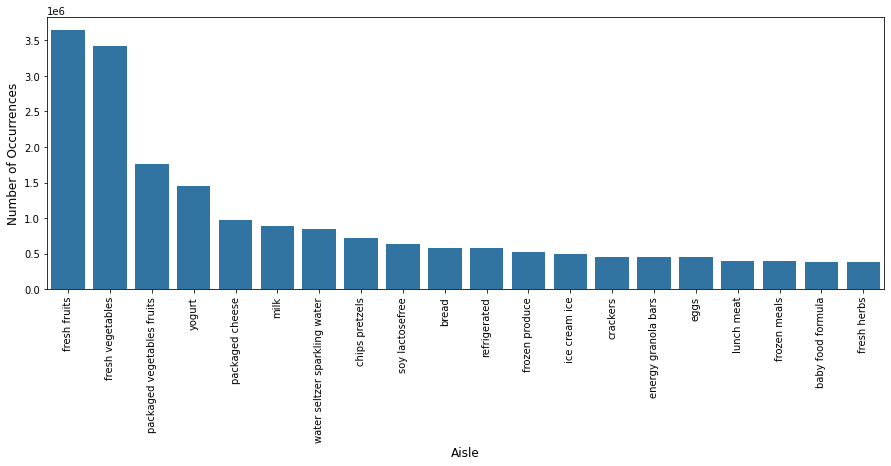

In [37]:
cnt_srs = order_products_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(15,5))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1.0, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

This data is in tandem with the frequently bought items table.

Now let us check the Department distribution with the help of a piechart.

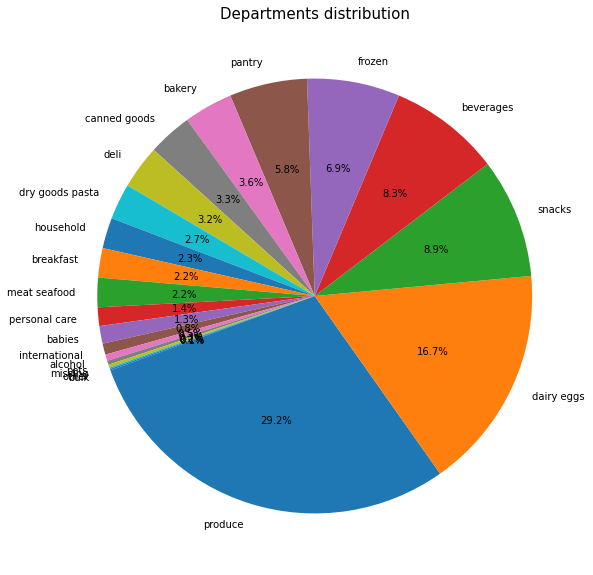

In [38]:
plt.figure(figsize=(15,10))
temp_series = order_products_prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce, dairy eggs and snacks constitute  majority of department.

Now let us check the reordered percentage of each department with the help of pointplot.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


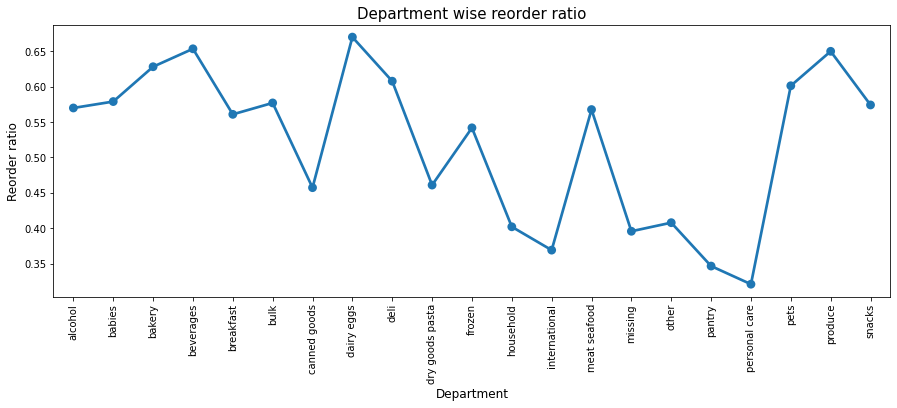

In [39]:
grouped_df = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,5))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=1.0, color=color[0])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

Now let us check the reordered percentage of each aisle.

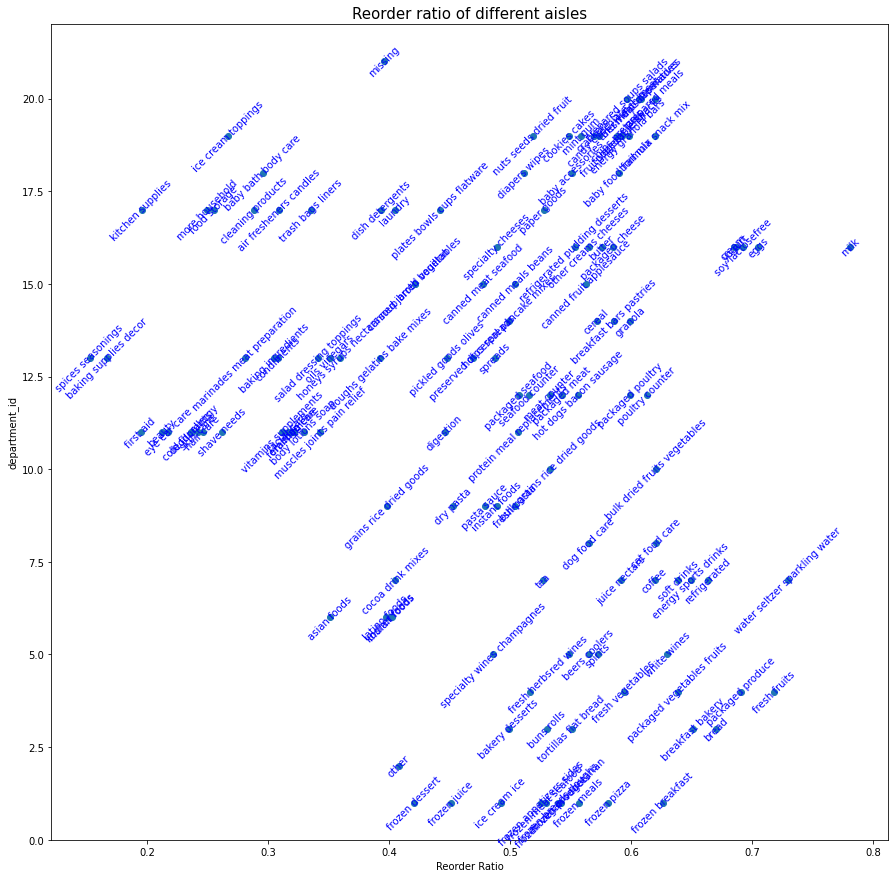

In [40]:
grouped_df = order_products_prior.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='blue')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

Let us now explore the relationship between how aadding to cart affects the reorder ratio.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


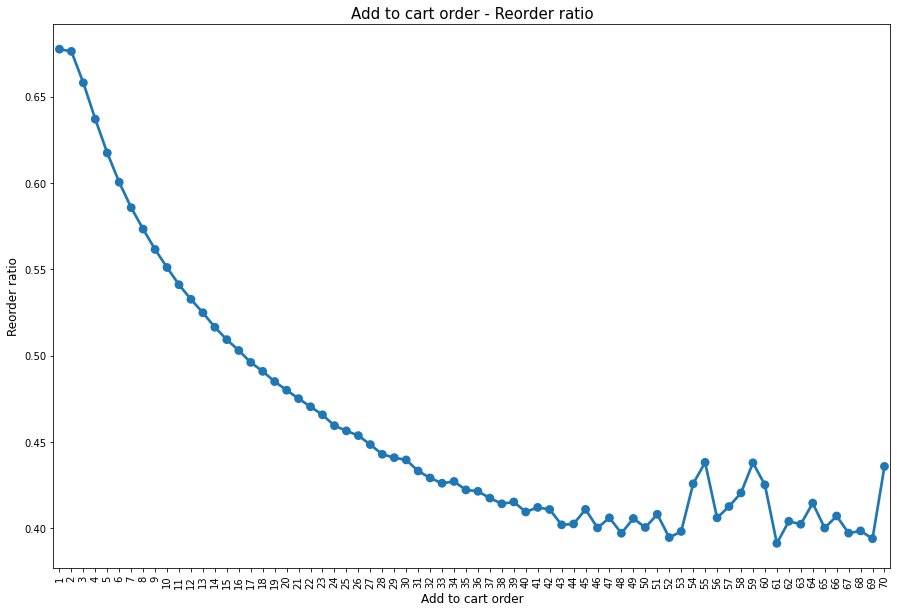

In [41]:
order_products_prior["add_to_cart_order_mod"] = order_products_prior["add_to_cart_order"].copy()
order_products_prior["add_to_cart_order_mod"][order_products_prior["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,10))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=1.0, color=color[0])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the graph we see that the items added to cart initially has high reorder ratio compared to the items added later on.

Now let us check the relation between reorder ratio and days of the week.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


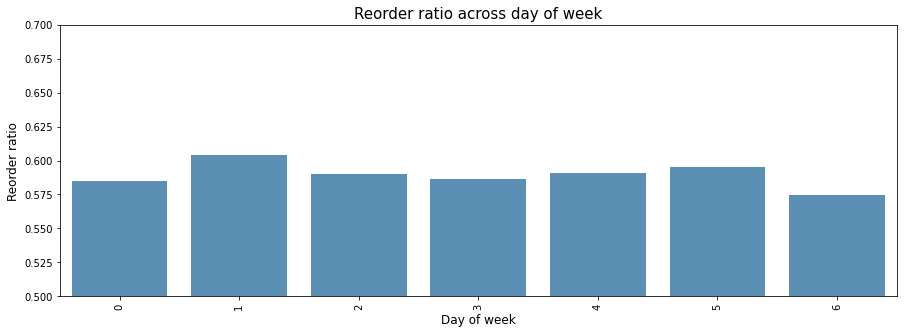

In [42]:
order_products_train = pd.merge(order_products_train, orders, on='order_id', how='left')
grouped_df = order_products_train.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,5))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[0])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

We can see that reordersare high on Sundays and Thursdays.

Now let us check the relation between reorder ratio and hours of the day.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


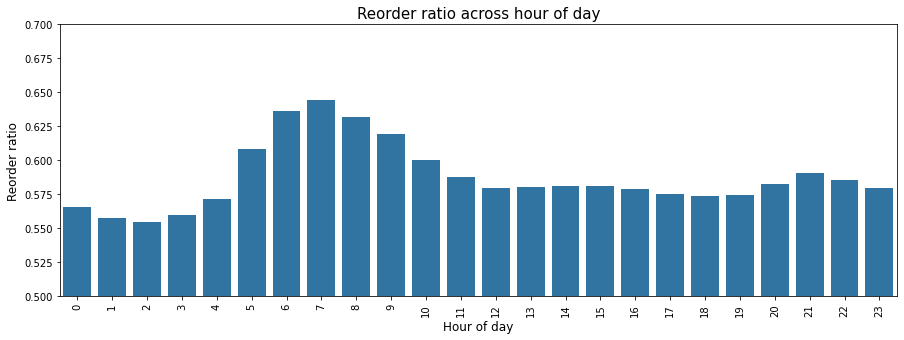

In [43]:
grouped_df = order_products_train.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,5))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=1.0, color=color[0])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

Finally lets will combine the day of week and hour of day to see the reorder distribution with the help of a heatmap

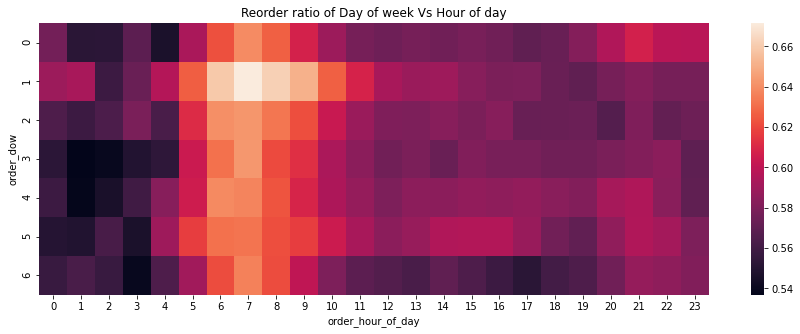

In [44]:
grouped_df = order_products_train.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(15,5))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

From the heatmap we can conclude that most of the reorders are done during early mornings.

# NATURAL LANGUAGE PROCESSING


In [55]:
#Reading the csv file and storing the elements in an array
import nltk
import re
import numpy as np
import pandas as pd


aisles = np.array(aisles)[ : ,-1]
aisles

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [56]:
#Creating the Bag of Words model
word2count = {}
for aisle in aisles:
    words = nltk.word_tokenize(aisle)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
word2count

{'prepared': 2,
 'soups': 1,
 'salads': 1,
 'specialty': 2,
 'cheeses': 2,
 'energy': 2,
 'granola': 2,
 'bars': 2,
 'instant': 1,
 'foods': 5,
 'marinades': 1,
 'meat': 7,
 'preparation': 1,
 'other': 2,
 'packaged': 6,
 'bakery': 2,
 'desserts': 2,
 'pasta': 3,
 'sauce': 1,
 'kitchen': 1,
 'supplies': 2,
 'cold': 1,
 'flu': 1,
 'allergy': 1,
 'fresh': 5,
 'meals': 3,
 'tofu': 1,
 'alternatives': 1,
 'seafood': 4,
 'herbs': 1,
 'baking': 2,
 'ingredients': 1,
 'bulk': 2,
 'dried': 4,
 'fruits': 3,
 'vegetables': 4,
 'oils': 1,
 'vinegars': 1,
 'oral': 1,
 'hygiene': 1,
 'cheese': 1,
 'hair': 1,
 'care': 8,
 'popcorn': 1,
 'jerky': 1,
 'soap': 2,
 'coffee': 1,
 'beers': 1,
 'coolers': 1,
 'red': 1,
 'wines': 3,
 'honeys': 1,
 'syrups': 1,
 'nectars': 2,
 'latino': 1,
 'refrigerated': 2,
 'produce': 2,
 'kosher': 1,
 'frozen': 10,
 'poultry': 2,
 'counter': 3,
 'butter': 1,
 'ice': 3,
 'cream': 3,
 'dog': 1,
 'food': 4,
 'cat': 1,
 'vegan': 1,
 'vegetarian': 1,
 'buns': 1,
 'rolls': 1,


In [57]:
#Heap of 50 frequently used words
import heapq
freq_words = heapq.nlargest(50, word2count, key=word2count.get)
freq_words

['frozen',
 'care',
 'meat',
 'packaged',
 'foods',
 'fresh',
 'seafood',
 'dried',
 'vegetables',
 'food',
 'goods',
 'canned',
 'pasta',
 'meals',
 'fruits',
 'wines',
 'counter',
 'ice',
 'cream',
 'breakfast',
 'fruit',
 'baby',
 'mixes',
 'prepared',
 'specialty',
 'cheeses',
 'energy',
 'granola',
 'bars',
 'other',
 'bakery',
 'desserts',
 'supplies',
 'baking',
 'bulk',
 'soap',
 'nectars',
 'refrigerated',
 'produce',
 'poultry',
 'dips',
 'spreads',
 'doughs',
 'grains',
 'rice',
 'drinks',
 'toppings',
 'juice',
 'body',
 'hot']

In [58]:
#Building the Bag of Words model
x=[]
for aisle in aisles:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(aisle):
            vector.append(1)
        else:
            vector.append(0)
    x.append(vector)
x = np.asarray(x)
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
#Tokenizing all the words present 
all_words = [nltk.word_tokenize(aisle) for aisle in aisles]

all_words    

[['prepared', 'soups', 'salads'],
 ['specialty', 'cheeses'],
 ['energy', 'granola', 'bars'],
 ['instant', 'foods'],
 ['marinades', 'meat', 'preparation'],
 ['other'],
 ['packaged', 'meat'],
 ['bakery', 'desserts'],
 ['pasta', 'sauce'],
 ['kitchen', 'supplies'],
 ['cold', 'flu', 'allergy'],
 ['fresh', 'pasta'],
 ['prepared', 'meals'],
 ['tofu', 'meat', 'alternatives'],
 ['packaged', 'seafood'],
 ['fresh', 'herbs'],
 ['baking', 'ingredients'],
 ['bulk', 'dried', 'fruits', 'vegetables'],
 ['oils', 'vinegars'],
 ['oral', 'hygiene'],
 ['packaged', 'cheese'],
 ['hair', 'care'],
 ['popcorn', 'jerky'],
 ['fresh', 'fruits'],
 ['soap'],
 ['coffee'],
 ['beers', 'coolers'],
 ['red', 'wines'],
 ['honeys', 'syrups', 'nectars'],
 ['latino', 'foods'],
 ['refrigerated'],
 ['packaged', 'produce'],
 ['kosher', 'foods'],
 ['frozen', 'meat', 'seafood'],
 ['poultry', 'counter'],
 ['butter'],
 ['ice', 'cream', 'ice'],
 ['frozen', 'meals'],
 ['seafood', 'counter'],
 ['dog', 'food', 'care'],
 ['cat', 'food', '

In [60]:
#Eliminating the stop words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [61]:
#Word Embedding using Word2Vec
from gensim.models import Word2Vec
word2vec = Word2Vec(all_words, min_count = 1)


In [62]:
vocabulary = word2vec.wv.index_to_key
print(vocabulary)

['frozen', 'care', 'meat', 'packaged', 'foods', 'fresh', 'canned', 'vegetables', 'seafood', 'food', 'dried', 'goods', 'breakfast', 'fruits', 'meals', 'wines', 'fruit', 'mixes', 'pasta', 'baby', 'counter', 'ice', 'cream', 'poultry', 'doughs', 'hot', 'grains', 'body', 'rice', 'soap', 'dips', 'juice', 'drinks', 'spreads', 'nectars', 'produce', 'toppings', 'refrigerated', 'prepared', 'bulk', 'cereal', 'supplies', 'bars', 'water', 'bread', 'granola', 'energy', 'cheeses', 'specialty', 'desserts', 'baking', 'bakery', 'mix', 'supplements', 'candy', 'chocolate', 'mint', 'ear', 'gum', 'eye', 'rolls', 'vitamins', 'vegetable', 'instant', 'pastries', 'vegetarian', 'snacks', 'preserved', 'salads', 'paper', 'soups', 'shave', 'needs', 'diapers', 'wipes', 'breads', 'buns', 'dog', 'vegan', 'cat', 'vinegars', 'oral', 'hygiene', 'ingredients', 'cheese', 'hair', 'popcorn', 'herbs', 'jerky', 'alternatives', 'coffee', 'beers', 'red', 'tofu', 'honeys', 'syrups', 'allergy', 'latino', 'flu', 'cold', 'kosher', '

In [63]:
#Representation of the vector 'fruits'
v1 = word2vec.wv['fruits']
v1

array([-0.00952613,  0.00955885, -0.00778271, -0.00264916, -0.00490735,
       -0.00497812, -0.00802157, -0.00776906, -0.0045578 , -0.00129495,
       -0.00508692,  0.00615454, -0.00951485, -0.00531637,  0.00943572,
        0.00698972,  0.00768283,  0.00421786,  0.00049316, -0.0059974 ,
        0.00601765,  0.0026315 ,  0.00772154,  0.00640572,  0.00794667,
        0.00867547, -0.00992058, -0.00675332,  0.00133697,  0.00645186,
        0.00738082,  0.00550808,  0.00768751, -0.00512149,  0.00658239,
       -0.00410289, -0.00905586,  0.00914003,  0.00132536, -0.00276017,
       -0.00247948, -0.00423812,  0.00481704,  0.00440399, -0.0026483 ,
       -0.00735311, -0.00355538, -0.00032909,  0.0061128 , -0.00283775,
       -0.00012207,  0.0008668 , -0.0071098 ,  0.00208777, -0.00143771,
        0.00281216,  0.00484415, -0.00134832, -0.00276202,  0.00772702,
        0.00504465,  0.00674905,  0.00453173,  0.00869331,  0.00747418,
       -0.00106425,  0.00876329,  0.00461746,  0.00543136, -0.00

In [64]:
#Obtaining the word vectors with the meaning similar to the word vector'food'
sim_words= word2vec.wv.most_similar('food')
sim_words

[('indian', 0.3137626051902771),
 ('allergy', 0.25096210837364197),
 ('supplements', 0.2477431744337082),
 ('detergents', 0.2359926849603653),
 ('frozen', 0.2168031483888626),
 ('bread', 0.21427905559539795),
 ('snacks', 0.20435336232185364),
 ('formula', 0.1882748007774353),
 ('cookies', 0.18385489284992218),
 ('sausage', 0.17982277274131775)]

In [66]:
#Obtaining TF-IDF vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(aisles)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,accessories,aid,air,allergy,alternatives,appetizers,applesauce,asian,baby,bacon,...,vegetable,vegetables,vegetarian,vinegars,vitamins,water,white,wines,wipes,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
